## Kaggle Compition- House prices Prediction-Train dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df_train=pd.read_csv("E:/house-prices-advanced-regression-techniques/train.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Frame Attributes

In [4]:
df_train.ndim

2

In [5]:
df_train.shape

(1460, 81)

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Concise summary of the data Frame

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

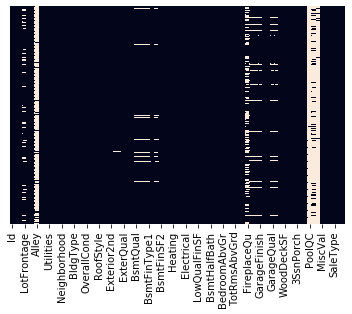

In [8]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [9]:
df_train=df_train.drop(["Id","Alley","PoolQC","Fence","MiscFeature"], axis=1)



In [10]:
df_train.shape

(1460, 76)

## Variables Identification

In [11]:
for i in df_train.columns:
    print('Variable Name:',i)
    print(df_train[i].value_counts())

Variable Name: MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
Variable Name: MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Variable Name: LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
        ... 
129.0      2
124.0      2
118.0      2
101.0      2
122.0      2
121.0      2
115.0      2
109.0      2
116.0      2
114.0      2
150.0      1
111.0      1
153.0      1
182.0      1
46.0       1
112.0      1
149.0  

Name: LowQualFinSF, dtype: int64
Variable Name: GrLivArea
864     22
1040    14
894     11
848     10
1456    10
912      9
1200     9
816      8
1092     8
1344     7
1728     7
987      7
1056     6
1224     6
1768     6
1494     6
1484     6
630      6
1144     5
1314     5
960      5
1252     5
1710     5
1392     5
988      5
990      5
1656     5
1218     5
1302     5
882      4
        ..
1357     1
1347     1
1453     1
1346     1
1343     1
1342     1
1338     1
1334     1
1327     1
1322     1
1385     1
1386     1
1387     1
1391     1
1446     1
3493     1
1436     1
1434     1
1429     1
1425     1
1411     1
1406     1
1405     1
1402     1
1400     1
3447     1
1396     1
1395     1
1393     1
2054     1
Name: GrLivArea, Length: 861, dtype: int64
Variable Name: BsmtFullBath
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
Variable Name: BsmtHalfBath
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
Variable Name: FullBath
2    768
1    65

## Data Type Transformations

In [12]:
df_train['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [13]:
df_train['YrSold']=df_train['YrSold'].astype('category')

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no


## Check duplicated rows

In [15]:
df_train.duplicated().sum()

0

## Finding Missing Values

In [16]:
for i in df_train.columns:
    print("Variable Name :",i)
    print(df_train[i].isnull().sum())

Variable Name : MSSubClass
0
Variable Name : MSZoning
0
Variable Name : LotFrontage
259
Variable Name : LotArea
0
Variable Name : Street
0
Variable Name : LotShape
0
Variable Name : LandContour
0
Variable Name : Utilities
0
Variable Name : LotConfig
0
Variable Name : LandSlope
0
Variable Name : Neighborhood
0
Variable Name : Condition1
0
Variable Name : Condition2
0
Variable Name : BldgType
0
Variable Name : HouseStyle
0
Variable Name : OverallQual
0
Variable Name : OverallCond
0
Variable Name : YearBuilt
0
Variable Name : YearRemodAdd
0
Variable Name : RoofStyle
0
Variable Name : RoofMatl
0
Variable Name : Exterior1st
0
Variable Name : Exterior2nd
0
Variable Name : MasVnrType
8
Variable Name : MasVnrArea
8
Variable Name : ExterQual
0
Variable Name : ExterCond
0
Variable Name : Foundation
0
Variable Name : BsmtQual
37
Variable Name : BsmtCond
37
Variable Name : BsmtExposure
38
Variable Name : BsmtFinType1
37
Variable Name : BsmtFinSF1
0
Variable Name : BsmtFinType2
38
Variable Name : B

In [17]:
df_train.shape

(1460, 76)

In [18]:
for i in df_train.columns:
    print("Variable Name :",i)
    print(df_train[i].isnull().sum())

Variable Name : MSSubClass
0
Variable Name : MSZoning
0
Variable Name : LotFrontage
259
Variable Name : LotArea
0
Variable Name : Street
0
Variable Name : LotShape
0
Variable Name : LandContour
0
Variable Name : Utilities
0
Variable Name : LotConfig
0
Variable Name : LandSlope
0
Variable Name : Neighborhood
0
Variable Name : Condition1
0
Variable Name : Condition2
0
Variable Name : BldgType
0
Variable Name : HouseStyle
0
Variable Name : OverallQual
0
Variable Name : OverallCond
0
Variable Name : YearBuilt
0
Variable Name : YearRemodAdd
0
Variable Name : RoofStyle
0
Variable Name : RoofMatl
0
Variable Name : Exterior1st
0
Variable Name : Exterior2nd
0
Variable Name : MasVnrType
8
Variable Name : MasVnrArea
8
Variable Name : ExterQual
0
Variable Name : ExterCond
0
Variable Name : Foundation
0
Variable Name : BsmtQual
37
Variable Name : BsmtCond
37
Variable Name : BsmtExposure
38
Variable Name : BsmtFinType1
37
Variable Name : BsmtFinSF1
0
Variable Name : BsmtFinType2
38
Variable Name : B

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [20]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## To Know the NaN values using Heatmap

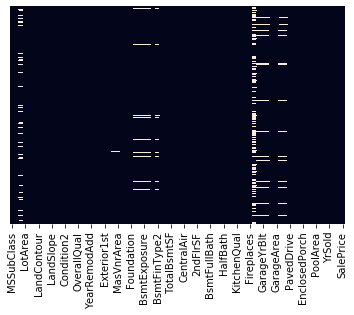

In [21]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

## Impute Missing Values

In [22]:
df_train["LotFrontage"]=df_train["LotFrontage"].fillna(df_train["LotFrontage"].median())

In [23]:
df_train["LotFrontage"].isnull().sum()

0

In [24]:
df_train["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [25]:
df_train["MasVnrType"].mode()

0    None
dtype: object

In [26]:
df_train["MasVnrType"]=df_train["MasVnrType"].fillna(df_train["MasVnrType"].mode()[0])

In [27]:
df_train["MasVnrType"].isnull().sum()

0

In [28]:
df_train["MasVnrArea"]=df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].median())

In [29]:
df_train["BsmtQual"]=df_train["BsmtQual"].fillna(df_train["BsmtQual"].mode()[0])

In [30]:
df_train["BsmtCond"]=df_train["BsmtCond"].fillna(df_train["BsmtCond"].mode()[0])

In [31]:
df_train["BsmtExposure"]=df_train["BsmtExposure"].fillna(df_train["BsmtExposure"].mode()[0])

In [32]:
df_train["BsmtFinType1"]=df_train["BsmtFinType1"].fillna(df_train["BsmtFinType1"].mode()[0])

In [33]:
df_train["BsmtFinType2"]=df_train["BsmtFinType2"].fillna(df_train["BsmtFinType2"].mode()[0])

In [34]:
df_train["Electrical"]=df_train["Electrical"].fillna(df_train["Electrical"].mode()[0])

In [35]:
df_train["FireplaceQu"]=df_train["FireplaceQu"].fillna(df_train["FireplaceQu"].mode()[0])

In [36]:
df_train["GarageType"]=df_train["GarageType"].fillna(df_train["GarageType"].mode()[0])

In [37]:
df_train["GarageYrBlt"]=df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].median())

In [38]:
df_train["GarageFinish"]=df_train["GarageFinish"].fillna(df_train["GarageFinish"].mode()[0])

In [39]:
df_train["GarageQual"]=df_train["GarageQual"].fillna(df_train["GarageQual"].mode()[0])

In [40]:
df_train["GarageCond"]=df_train["GarageCond"].fillna(df_train["GarageCond"].mode()[0])

In [41]:
for i in df_train.columns:
    print("Variable Name :",i)
    print(df_train[i].isnull().sum())

Variable Name : MSSubClass
0
Variable Name : MSZoning
0
Variable Name : LotFrontage
0
Variable Name : LotArea
0
Variable Name : Street
0
Variable Name : LotShape
0
Variable Name : LandContour
0
Variable Name : Utilities
0
Variable Name : LotConfig
0
Variable Name : LandSlope
0
Variable Name : Neighborhood
0
Variable Name : Condition1
0
Variable Name : Condition2
0
Variable Name : BldgType
0
Variable Name : HouseStyle
0
Variable Name : OverallQual
0
Variable Name : OverallCond
0
Variable Name : YearBuilt
0
Variable Name : YearRemodAdd
0
Variable Name : RoofStyle
0
Variable Name : RoofMatl
0
Variable Name : Exterior1st
0
Variable Name : Exterior2nd
0
Variable Name : MasVnrType
0
Variable Name : MasVnrArea
0
Variable Name : ExterQual
0
Variable Name : ExterCond
0
Variable Name : Foundation
0
Variable Name : BsmtQual
0
Variable Name : BsmtCond
0
Variable Name : BsmtExposure
0
Variable Name : BsmtFinType1
0
Variable Name : BsmtFinSF1
0
Variable Name : BsmtFinType2
0
Variable Name : BsmtFinS

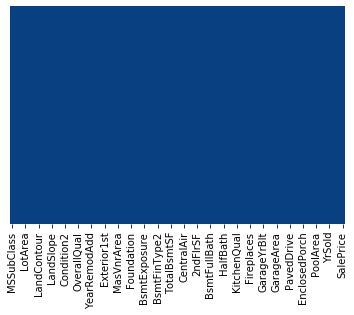

In [42]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap="GnBu_r")

In [43]:
#df_train.dropna(inplace=True) #### Remove record of  electrical column NaN

In [44]:
df_train.shape

(1460, 76)

In [45]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000


## finding Outliers

## Univarient Analysis

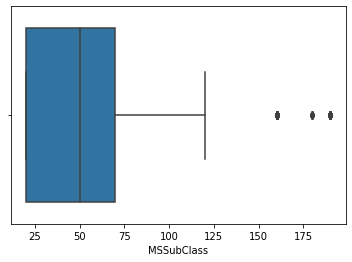

In [46]:
sns.boxplot(df_train['MSSubClass']) ### For Numerical variable
plt.show()

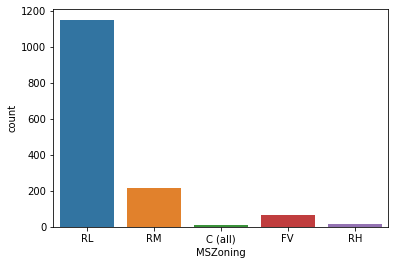

In [47]:
sns.countplot(df_train['MSZoning']) ### For categorical variable
plt.show()

## Bivarient Analysis

In [48]:
df_train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.011378


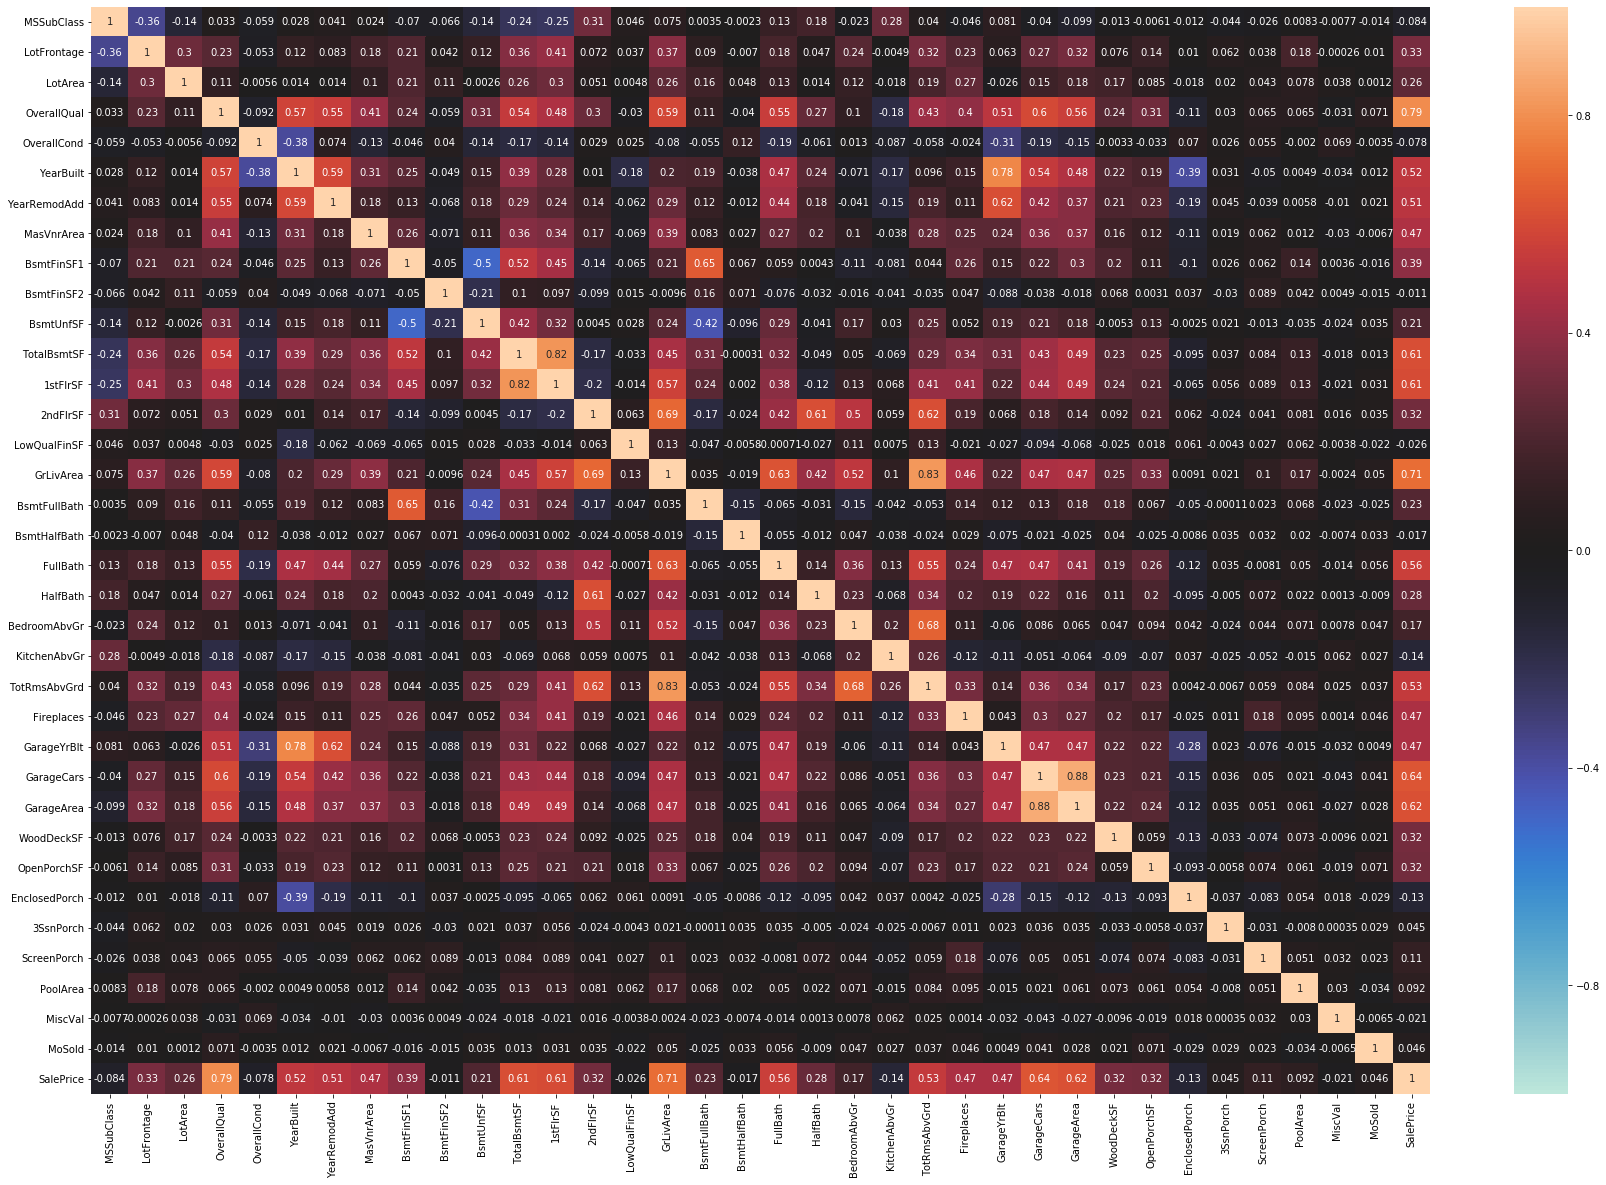

In [49]:
#correlation matrix
myBasicCorr = df_train.corr()
f, ax = plt.subplots(figsize=(30, 20))
#sns.heatmap(myBasicCorr,annot=True);

sns.heatmap(myBasicCorr, annot=True, vmin=-1,vmax=1,center=0)


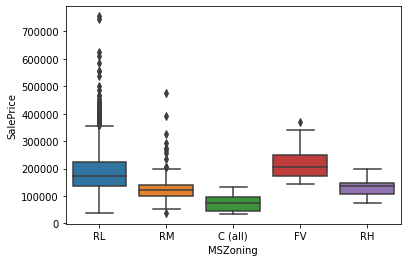

In [50]:
### Bivarient Analysis ---- 1 continuous variable and 1 categirical variable - using Boxplot
sns.boxplot(x="MSZoning", y="SalePrice",data=df_train)


## Multivarient Analysis

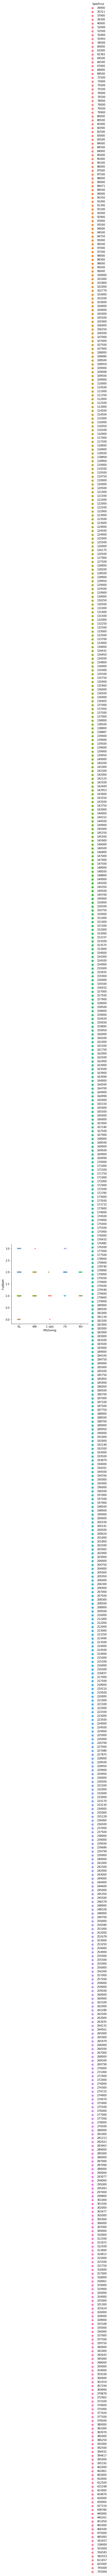

In [53]:
sns.catplot(x="MSZoning",y="FullBath",hue="SalePrice",data=df_train)

##  House Price prediction Test Dataset

In [51]:
df_test=pd.read_csv("E:/house-prices-advanced-regression-techniques/test.csv")

In [52]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Test data Attributes

In [53]:
df_test.ndim

2

In [54]:
df_test.shape

(1459, 80)

In [55]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

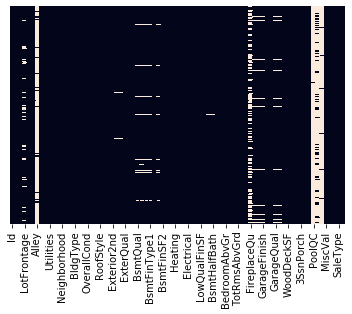

In [57]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)

In [58]:
df_test=df_test.drop(["Id","Alley","PoolQC","Fence","MiscFeature"], axis=1)


In [59]:
df_test.shape

(1459, 75)

## Variables Identification

In [60]:
for i in df_test.columns:
    print('Variable Name:',i)
    print(df_test[i].value_counts())

Variable Name: MSSubClass
20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
180      7
75       7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64
Variable Name: MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64
Variable Name: LotFrontage
60.0     133
80.0      68
70.0      63
50.0      60
75.0      52
65.0      49
85.0      36
63.0      30
24.0      30
21.0      27
68.0      25
74.0      24
64.0      24
90.0      23
72.0      22
62.0      22
78.0      21
82.0      16
73.0      15
59.0      14
57.0      14
56.0      14
76.0      14
53.0      14
52.0      14
100.0     12
88.0      12
51.0      12
81.0      12
43.0      11
        ... 
128.0      2
160.0      2
124.0      2
37.0       2
36.0       2
104.0      2
109.0      2
115.0      1
123.0      1
150.0      1
134.0      1
121.0      1
101.0      1
135.0      1
140.0      1
117.0    

Name: GrLivArea, Length: 879, dtype: int64
Variable Name: BsmtFullBath
0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64
Variable Name: BsmtHalfBath
0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64
Variable Name: FullBath
2    762
1    659
3     31
4      4
0      3
Name: FullBath, dtype: int64
Variable Name: HalfBath
0    921
1    525
2     13
Name: HalfBath, dtype: int64
Variable Name: BedroomAbvGr
3    792
2    384
4    187
1     53
5     27
6     14
0      2
Name: BedroomAbvGr, dtype: int64
Variable Name: KitchenAbvGr
1    1393
2      64
0       2
Name: KitchenAbvGr, dtype: int64
Variable Name: KitchenQual
TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64
Variable Name: TotRmsAbvGrd
6     442
7     320
5     308
8     160
4      99
9      68
10     33
11     14
3       8
12      5
15      1
13      1
Name: TotRmsAbvGrd, dtype: int64
Variable Name: Functional
Typ     1357
Min2      36
Min1      34
Mod       20
Maj1

## Data Type Transformations

In [61]:
df_test['YrSold']=df_test['YrSold'].astype('category')

In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
MasVnrType       1443 no

## To check duplicated rows

In [63]:
df_test.duplicated().sum()

0

## Finding Missing values

In [64]:
for i in df_test.columns:
    print("Variable Name :",i)
    print(df_test[i].isnull().sum())

Variable Name : MSSubClass
0
Variable Name : MSZoning
4
Variable Name : LotFrontage
227
Variable Name : LotArea
0
Variable Name : Street
0
Variable Name : LotShape
0
Variable Name : LandContour
0
Variable Name : Utilities
2
Variable Name : LotConfig
0
Variable Name : LandSlope
0
Variable Name : Neighborhood
0
Variable Name : Condition1
0
Variable Name : Condition2
0
Variable Name : BldgType
0
Variable Name : HouseStyle
0
Variable Name : OverallQual
0
Variable Name : OverallCond
0
Variable Name : YearBuilt
0
Variable Name : YearRemodAdd
0
Variable Name : RoofStyle
0
Variable Name : RoofMatl
0
Variable Name : Exterior1st
1
Variable Name : Exterior2nd
1
Variable Name : MasVnrType
16
Variable Name : MasVnrArea
15
Variable Name : ExterQual
0
Variable Name : ExterCond
0
Variable Name : Foundation
0
Variable Name : BsmtQual
44
Variable Name : BsmtCond
45
Variable Name : BsmtExposure
44
Variable Name : BsmtFinType1
42
Variable Name : BsmtFinSF1
1
Variable Name : BsmtFinType2
42
Variable Name :

In [65]:
df_test.shape

(1459, 75)

In [66]:
for i in df_test.columns:
    print("Variable Name :",i)
    print(df_test[i].isnull().sum())

Variable Name : MSSubClass
0
Variable Name : MSZoning
4
Variable Name : LotFrontage
227
Variable Name : LotArea
0
Variable Name : Street
0
Variable Name : LotShape
0
Variable Name : LandContour
0
Variable Name : Utilities
2
Variable Name : LotConfig
0
Variable Name : LandSlope
0
Variable Name : Neighborhood
0
Variable Name : Condition1
0
Variable Name : Condition2
0
Variable Name : BldgType
0
Variable Name : HouseStyle
0
Variable Name : OverallQual
0
Variable Name : OverallCond
0
Variable Name : YearBuilt
0
Variable Name : YearRemodAdd
0
Variable Name : RoofStyle
0
Variable Name : RoofMatl
0
Variable Name : Exterior1st
1
Variable Name : Exterior2nd
1
Variable Name : MasVnrType
16
Variable Name : MasVnrArea
15
Variable Name : ExterQual
0
Variable Name : ExterCond
0
Variable Name : Foundation
0
Variable Name : BsmtQual
44
Variable Name : BsmtCond
45
Variable Name : BsmtExposure
44
Variable Name : BsmtFinType1
42
Variable Name : BsmtFinSF1
1
Variable Name : BsmtFinType2
42
Variable Name :

In [67]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


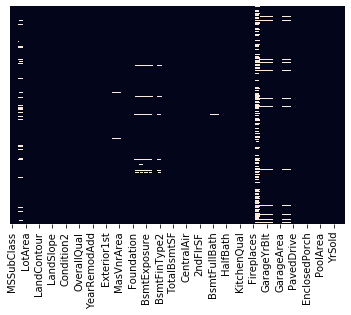

In [68]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)

## Impute Missing Values

In [69]:
df_test["MSZoning"]=df_test["MSZoning"].fillna(df_test["MSZoning"].mode()[0])

In [70]:
df_test["LotFrontage"]=df_test["LotFrontage"].fillna(df_test["LotFrontage"].median())

In [71]:
df_test["Utilities"]=df_test["Utilities"].fillna(df_test["Utilities"].mode()[0])

In [72]:
df_test["Exterior1st"]=df_test["Exterior1st"].fillna(df_test["Exterior1st"].mode()[0])

In [73]:
df_test["Exterior2nd"]=df_test["Exterior2nd"].fillna(df_test["Exterior2nd"].mode()[0])

In [74]:
df_test["MasVnrType"]=df_test["MasVnrType"].fillna(df_test["MasVnrType"].mode()[0])

In [75]:
df_test["MasVnrArea"]=df_test["MasVnrArea"].fillna(df_test["MasVnrArea"].median())

In [76]:
df_test["BsmtQual"]=df_test["BsmtQual"].fillna(df_test["BsmtQual"].mode()[0])

In [77]:
df_test["BsmtCond"]=df_test["BsmtCond"].fillna(df_test["BsmtCond"].mode()[0])

In [78]:
df_test["BsmtExposure"]=df_test["BsmtExposure"].fillna(df_test["BsmtExposure"].mode()[0])

In [79]:
df_test["BsmtFinType1"]=df_test["BsmtFinType1"].fillna(df_test["BsmtFinType1"].mode()[0])

In [80]:
df_test["BsmtFinSF1"]=df_test["BsmtFinSF1"].fillna(df_test["BsmtFinSF1"].median())

In [81]:
df_test["BsmtFinType2"]=df_test["BsmtFinType2"].fillna(df_test["BsmtFinType2"].mode()[0])

In [82]:
df_test["BsmtFinSF2"]=df_test["BsmtFinSF2"].fillna(df_test["BsmtFinSF2"].median())

In [83]:
df_test["BsmtUnfSF"]=df_test["BsmtUnfSF"].fillna(df_test["BsmtUnfSF"].median())

In [84]:
df_test["TotalBsmtSF"]=df_test["TotalBsmtSF"].fillna(df_test["TotalBsmtSF"].median())

In [85]:
df_test["BsmtFullBath"]=df_test["BsmtFullBath"].fillna(df_test["BsmtFullBath"].mode()[0])

In [86]:
df_test["BsmtHalfBath"]=df_test["BsmtHalfBath"].fillna(df_test["BsmtHalfBath"].mode()[0])

In [87]:
df_test["KitchenQual"]=df_test["KitchenQual"].fillna(df_test["KitchenQual"].mode()[0])

In [88]:
df_test["Functional"]=df_test["Functional"].fillna(df_test["Functional"].mode()[0])

In [89]:
df_test["FireplaceQu"]=df_test["FireplaceQu"].fillna(df_test["FireplaceQu"].mode()[0])

In [90]:
df_test["GarageType"]=df_test["GarageType"].fillna(df_test["GarageType"].mode()[0])

In [91]:
df_test["GarageYrBlt"]=df_test["GarageYrBlt"].fillna(df_test["GarageYrBlt"].median())

In [92]:
df_test["GarageFinish"]=df_test["GarageFinish"].fillna(df_test["GarageFinish"].mode()[0])

In [93]:
df_test["GarageCars"]=df_test["GarageCars"].fillna(df_test["GarageCars"].mode()[0])

In [94]:
df_test["GarageArea"]=df_test["GarageArea"].fillna(df_test["GarageArea"].median())

In [95]:
df_test["GarageQual"]=df_test["GarageQual"].fillna(df_test["GarageQual"].mode()[0])

In [96]:
df_test["GarageCond"]=df_test["GarageCond"].fillna(df_test["GarageCond"].mode()[0])

In [97]:
df_test["SaleType"]=df_test["SaleType"].fillna(df_test["SaleType"].mode()[0])

In [98]:
for i in df_test.columns:
    print("Variable Name :",i)
    print(df_test[i].isnull().sum())

Variable Name : MSSubClass
0
Variable Name : MSZoning
0
Variable Name : LotFrontage
0
Variable Name : LotArea
0
Variable Name : Street
0
Variable Name : LotShape
0
Variable Name : LandContour
0
Variable Name : Utilities
0
Variable Name : LotConfig
0
Variable Name : LandSlope
0
Variable Name : Neighborhood
0
Variable Name : Condition1
0
Variable Name : Condition2
0
Variable Name : BldgType
0
Variable Name : HouseStyle
0
Variable Name : OverallQual
0
Variable Name : OverallCond
0
Variable Name : YearBuilt
0
Variable Name : YearRemodAdd
0
Variable Name : RoofStyle
0
Variable Name : RoofMatl
0
Variable Name : Exterior1st
0
Variable Name : Exterior2nd
0
Variable Name : MasVnrType
0
Variable Name : MasVnrArea
0
Variable Name : ExterQual
0
Variable Name : ExterCond
0
Variable Name : Foundation
0
Variable Name : BsmtQual
0
Variable Name : BsmtCond
0
Variable Name : BsmtExposure
0
Variable Name : BsmtFinType1
0
Variable Name : BsmtFinSF1
0
Variable Name : BsmtFinType2
0
Variable Name : BsmtFinS

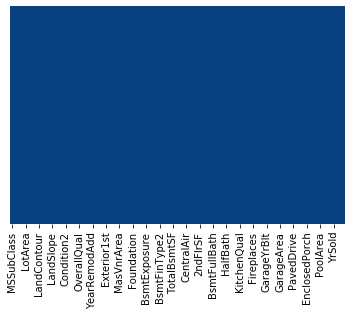

In [99]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap="GnBu_r")

In [100]:
df_test.shape

(1459, 75)

## Combine Train and Test datasets

In [101]:
df_final=pd.concat([df_train,df_test],axis=0)

C:\Users\Venkateswara Rao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [102]:
df_final.shape

(2919, 76)

In [103]:
df_final.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [104]:
df_final.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscVal',
       'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       

### One hot encoding for the categorical variables

In [105]:
df_final=pd.get_dummies(df_final,drop_first=True)

In [106]:
df_final.shape

(2919, 240)

In [107]:
df_final

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,1,1,0,0,1,0,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,1,1,0,1,0,0,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,1,1,0,0,1,0,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,1,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,1,1,0,0,1,0,0
5,796,566,320,1,732.0,0.0,1.0,0.0,64.0,0,...,0,0,0,1,1,0,0,0,1,0
6,1694,0,0,3,1369.0,0.0,1.0,0.0,317.0,0,...,0,0,0,1,1,0,1,0,0,0
7,1107,983,0,3,859.0,32.0,1.0,0.0,216.0,228,...,0,0,0,1,1,0,0,0,1,0
8,1022,752,0,2,0.0,0.0,0.0,0.0,952.0,205,...,0,0,0,1,1,0,0,1,0,0
9,1077,0,0,2,851.0,0.0,1.0,0.0,140.0,0,...,0,0,0,1,1,0,0,1,0,0


In [108]:
df_final.shape

(2919, 240)

In [109]:
df_final.columns.duplicated().sum() ### To check redundency of the columns names in the dataFrame

0

In [110]:
df_final=df_final.loc[:,~df_final.columns.duplicated()]

In [111]:
df_final.shape

(2919, 240)

## Standard Normalization

In [112]:
feature_scale=[feature for feature in df_final.columns if feature not in ['SalePrice']]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df_final[feature_scale])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [113]:
df_final1=pd.concat([df_final['SalePrice'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df_final[feature_scale]),columns=feature_scale)],axis=1)

In [114]:
df_final1.shape

(2919, 240)

In [115]:
df_final1.head()

,SalePrice,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,208500.0,-0.773861,1.207379,-0.103331,0.169927,0.580971,-0.293025,1.087334,-0.249719,-0.934776,...,-0.052423,-0.298629,-0.049029,0.394439,0.064249,-0.018512,-0.557433,1.921699,-0.53364,-0.362485
1,181500.0,0.261075,-0.785025,-0.103331,0.169927,1.178173,-0.293025,-0.818929,3.822508,-0.629812,...,-0.052423,-0.298629,-0.049029,0.394439,0.064249,-0.018512,1.793936,-0.520373,-0.53364,-0.362485
2,223500.0,-0.610718,1.235375,-0.103331,0.169927,0.097941,-0.293025,1.087334,-0.249719,-0.288435,...,-0.052423,-0.298629,-0.049029,0.394439,0.064249,-0.018512,-0.557433,1.921699,-0.53364,-0.362485
3,140000.0,-0.506205,0.978742,-0.103331,0.169927,-0.494869,-0.293025,1.087334,-0.249719,-0.047196,...,-0.052423,-0.298629,-0.049029,0.394439,0.064249,-0.018512,-0.557433,-0.520373,-0.53364,-0.362485
4,250000.0,-0.037170,1.671651,-0.103331,1.385655,0.468996,-0.293025,1.087334,-0.249719,-0.160988,...,-0.052423,-0.298629,-0.049029,0.394439,0.064249,-0.018512,-0.557433,1.921699,-0.53364,-0.362485


In [116]:
X_train=df_final1.iloc[:1460, :]

In [117]:
X_test=df_final1.iloc[1460:,:]

In [118]:
X_train.shape

(1460, 240)

In [119]:
X_test.shape

(1459, 240)

In [120]:
y_train=X_train['SalePrice']

In [121]:
y_train.shape

(1460,)

In [122]:
X_train=X_train.drop(['SalePrice'],axis=1)

In [123]:
X_train.shape

(1460, 239)

In [124]:
X_test=X_test.drop(['SalePrice'],axis=1)

In [125]:
X_test.shape

(1459, 239)

In [126]:
y_train.shape

(1460,)

## Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [760]:
lm = LinearRegression()
lm=lm .fit(X_train, y_train)

In [761]:
lm.score(X_train,y_train)

0.9307027482105843

In [762]:
y_pred=lm.predict(X_test)
y_pred

array([113574.76953125, 162036.3125    , 190567.875     , ...,
       180624.0625    , 104845.63671875, 220912.55859375])

In [763]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

C:\Users\Venkateswara Rao\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [764]:
y_pred_rf

array([134415., 146175., 184694., ..., 157340., 111010., 216240.])

In [765]:
rf.score(X_train,y_train)

0.973516489282962

In [269]:
! pip install XGBOOST

In [131]:
import xgboost

In [132]:
regressor=xgboost.XGBRegressor()

In [621]:
booster=['gbtree','gblinear']
base_score=[0.25,0.50,0.75,1]

## Hyper parameter Tuning in XGboost

In [622]:
### Hyper parameter optimization 
n_estimators=[100,500,900,1100,1500]
max_depth=[2,3,5,10,15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.10,0.15,0.20]
min_child_weight=[1,2,3,4]
### Define hyperparameters to search
hyperparameter_grid={
    'n_estimators': n_estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight,
    'booster' : booster,
    'base_score' : base_score
    
}

In [623]:
from sklearn.model_selection import RandomizedSearchCV

In [624]:
### Set up random search with 4-fold cross validation
random_cv=RandomizedSearchCV(estimator=regressor,
                            param_distributions=hyperparameter_grid,
                            cv=5,n_iter=50,
                            scoring='neg_mean_absolute_error',n_jobs=4,
                            verbose=5,
                            return_train_score=True,
                            random_state=123)

In [625]:
random_cv.fit(X_train,y_train)



Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 70.4min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 90.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                              

In [626]:
random_cv.best_estimator_



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [213]:
### Here replace nan with None then only error rectifier
regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, monotone_constraints=None,
             n_estimators=850, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)


In [214]:
regressor=regressor.fit( X_train, y_train)

In [215]:
regressor.score(X_train,y_train)

0.9876031979601251

In [220]:
! pip install lightGBM

In [127]:
import lightgbm 

In [128]:
regressor=lightgbm.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=900,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [129]:
regressor=regressor.fit( X_train, y_train)

In [130]:
regressor.score(X_train,y_train)

0.9759661226192655

In [131]:
import pickle
filename='final_model.pkl'
pickle.dump(regressor,open(filename,'wb'))

In [132]:
y_pred=regressor.predict(X_test)

In [133]:
y_pred

array([124981.90903508, 154558.25710989, 189536.4740147 , ...,
       162302.1286441 , 127777.69902573, 217971.40901389])

In [134]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('E:/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)